# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load dataset

In [2]:
car_data = pd.read_csv('dataset/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data profiling

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(car_data, title='Car Price Data Report')

In [4]:
profile.to_file('Car_Price_Data_Report.html')

# EDA (Exploratory Data Analysis)

In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

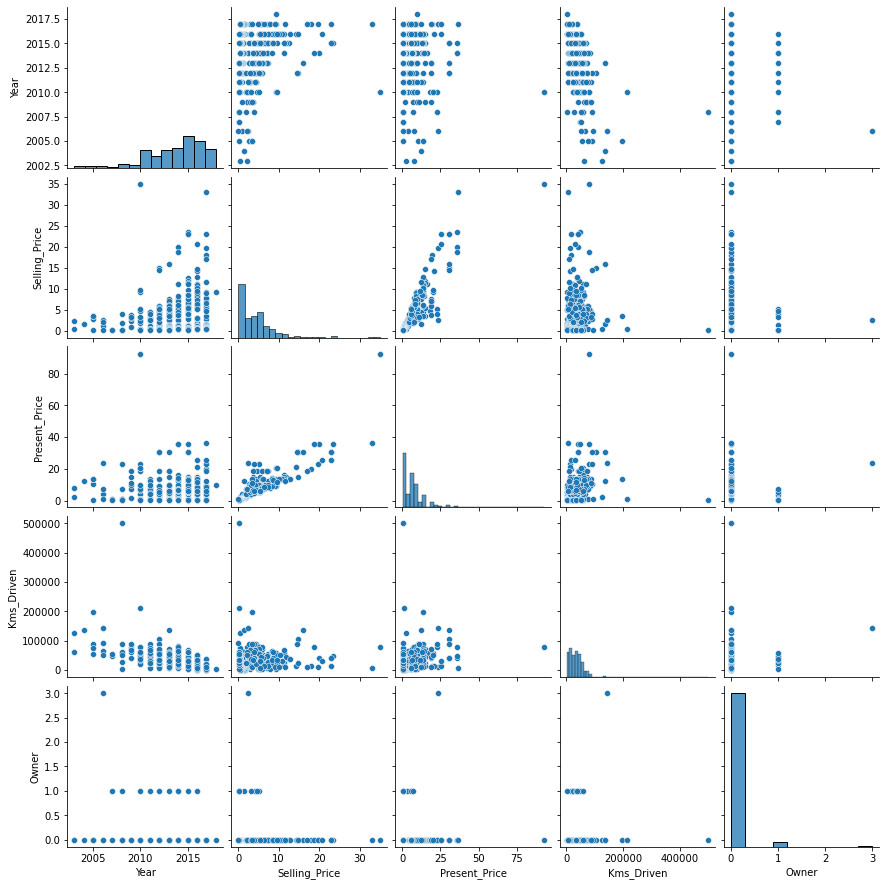

In [8]:
sns.pairplot(car_data)

<AxesSubplot:>

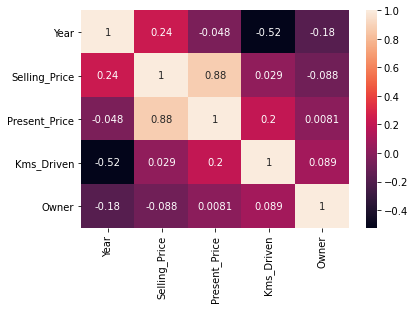

In [9]:
sns.heatmap(car_data.corr(), annot=True)

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

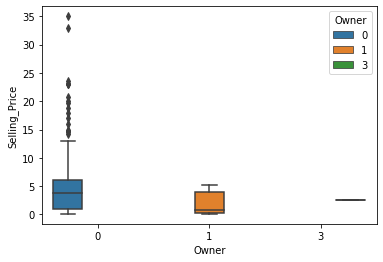

In [10]:
sns.boxplot(x='Owner', y='Selling_Price', hue='Owner', data=car_data)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

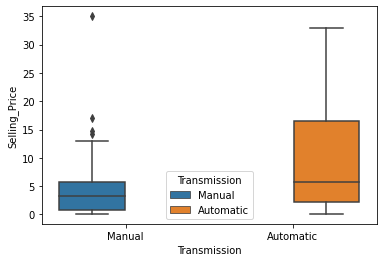

In [11]:
sns.boxplot(x='Transmission', y='Selling_Price', hue='Transmission', data=car_data)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

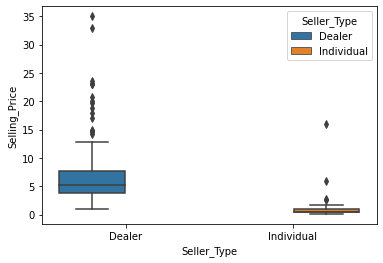

In [12]:
sns.boxplot(x='Seller_Type', y='Selling_Price', hue='Seller_Type', data=car_data)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

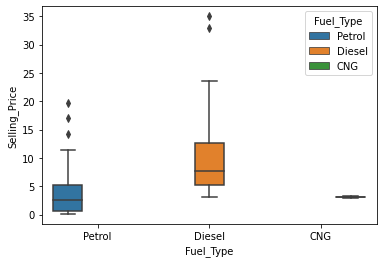

In [13]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', hue='Fuel_Type', data=car_data)

In [14]:
final_car_data = car_data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [15]:
final_car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Converting year into Number of years

In [16]:
final_car_data['Current_Year'] = 2021

In [17]:
final_car_data['Number_Of_Years'] = final_car_data['Current_Year'] - final_car_data['Year']

In [18]:
final_car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_Of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [19]:
final_car_data.drop(['Year', 'Current_Year'], axis=1, inplace=True)

In [20]:
final_car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### Converting categorical data into numerical data using encoding

In [21]:
final_car_data = pd.get_dummies(final_car_data, drop_first=True)

In [22]:
final_car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


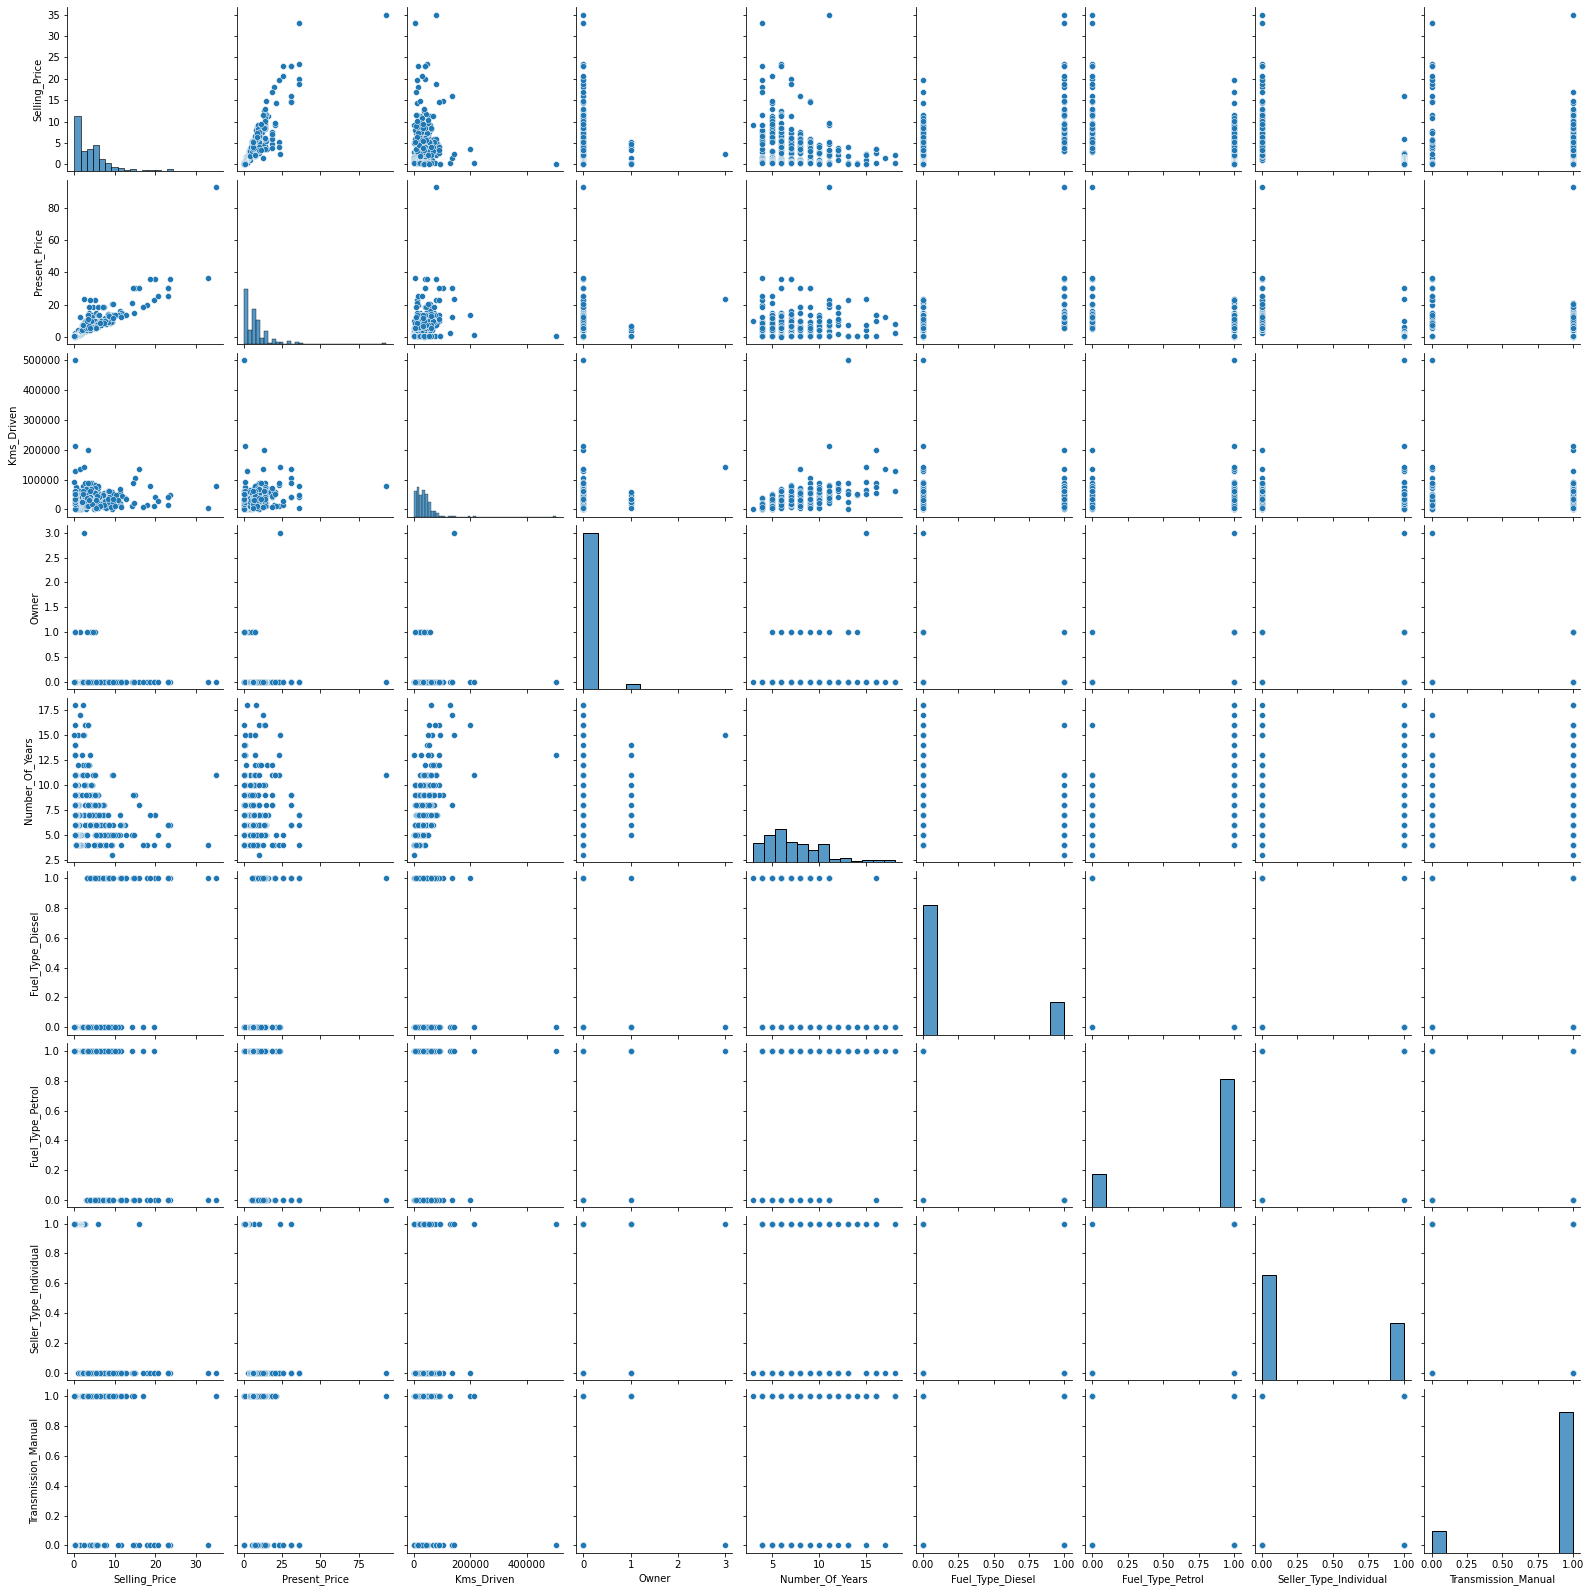

In [23]:
sns.pairplot(final_car_data)

In [24]:
final_car_data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_Of_Years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

# Dividing data into features and target columns

In [25]:
X = final_car_data[['Present_Price', 'Kms_Driven', 'Owner',
       'Number_Of_Years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual']]
y = final_car_data['Selling_Price']

### Maximum and Minimum Selling Price

In [26]:
print("Maximum Selling Price: ", max(y))
print("Minimum Selling Price: ", min(y))

Maximum Selling Price:  35.0
Minimum Selling Price:  0.1


# Split data into train and test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a model using Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
ran_for_model = RandomForestRegressor()
ran_for_model.fit(X_train, y_train)

RandomForestRegressor()

# Predict from the mode

In [29]:
y_pred = ran_for_model.predict(X_test)

In [30]:
y_pred

array([ 0.4786, 10.909 ,  5.066 ,  0.2135,  7.473 ,  6.2245,  1.05  ,
        0.5437,  0.4757,  6.874 ,  7.9163,  0.9867,  8.1906,  0.4708,
        5.416 ,  2.546 ,  1.1536, 13.3363,  0.4683,  1.5585,  0.273 ,
        8.1339,  4.738 ,  2.8345,  0.4933,  3.9715,  5.4275,  3.35  ,
        1.1681,  1.2095,  0.5059,  9.7375,  0.4597,  2.6725,  7.793 ,
        4.223 ,  6.636 ,  5.771 ,  2.657 ,  6.2095,  4.507 ,  3.5475,
        5.    ,  0.563 ,  6.0825,  0.7754,  8.5165,  5.727 ,  2.956 ,
        4.072 ,  4.9225,  1.4678, 22.36  , 20.6765,  6.413 , 10.275 ,
        5.045 ,  9.0985,  2.635 ,  6.767 ,  0.2336,  0.2251,  0.8125,
        0.4399,  4.2815,  1.1122, 21.7523, 21.3848,  6.2265,  0.4857,
        3.7945,  3.8405,  5.7735,  4.546 ,  2.8385,  1.0051,  0.7645,
       11.72  ,  0.3896,  9.9907,  5.2265,  3.511 ,  5.507 , 14.8908,
        2.5455,  0.4668,  1.1635,  2.9115,  0.4756, 17.0895,  1.1419])

# Performance measure of the model

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

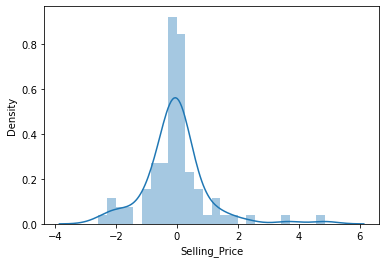

In [31]:
sns.distplot((y_test - y_pred))

In [32]:
from sklearn import metrics

def performance_measure(true, predict):
    mae = metrics.mean_absolute_error(true, predict)
    mse = metrics.mean_squared_error(true, predict)
    rmse = np.sqrt(mse)
    r2_score = metrics.r2_score(true, predict)
    print('===============================================')
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Score:', r2_score)
    print('===============================================')

In [33]:
performance_measure(y_test, y_pred)

MAE: 0.6338538461538464
MSE: 1.0852658381318692
RMSE: 1.04176093137143
R2 Score: 0.9618859944778269


In [34]:
from sklearn.model_selection import cross_val_score

def cv_score(model, X, y):
    pred = cross_val_score(model, X, y, cv=10)
    print(pred)
    print('===============================================')
    print('Cross Validation Score:', pred.mean())
    print('===============================================')

### Cross Validation Score for all the data

In [35]:
cv_score(ran_for_model, X, y)

[ 0.89329491  0.96973106  0.72148878  0.9731251  -0.96199897 -3.67425551
  0.96565172  0.89145094  0.88497819  0.86390163]
Cross Validation Score: 0.25273678291380797


### Cross Validation Score for the train data

In [36]:
cv_score(ran_for_model, X_train, y_train)

[0.96601045 0.79522127 0.96581155 0.91361517 0.90376664 0.81863333
 0.83139517 0.93449303 0.91460173 0.91586103]
Cross Validation Score: 0.8959409371318182


### Cross Validation Score for the test data

In [37]:
cv_score(ran_for_model, X_test, y_test)

[0.97727264 0.8068857  0.97393268 0.9345412  0.08820213 0.77092203
 0.9114446  0.97732346 0.89288048 0.8658223 ]
Cross Validation Score: 0.8199227210951486
